# 实验报告—获取上市公司基础数据及近三年净利润

### 引用库进行数据处理并导入默认路径

In [1]:
import re
import pdfplumber
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
os.chdir('C:\\Users\\86187\\Desktop\\金融数据获取与处理\\2019年报')

### 判断文件类型并导入pdf文件

In [2]:
PDF_path = r'C:\\Users\\86187\\Desktop\\金融数据获取与处理\\2019年报'
PDFslist = []
for files in os.walk(PDF_path):
    for file in files[2]:
        if os.path.splitext(file)[1] == '.pdf' or os.path.splitext(file)[1] == '.PDF':
           PDFslist.append(file)
print(PDFslist)

['300081：2019年年度报告.pdf', '300161：2019年年度报告.pdf', '300174：2019年年度报告.pdf', '300214：2019年年度报告.pdf', '300235：2019年年度报告.pdf', '300316：2019年年度报告.pdf', '300363：2019年年度报告.pdf', '300370：2019年年度报告.pdf', '300428：2019年年度报告.pdf', '300442：2019年年度报告.pdf', '300451：2019年年度报告.pdf', '300460：2019年年度报告.pdf', '300492：2019年年度报告.pdf', '300502：2019年年度报告.pdf', '300504：2019年年度报告.pdf', '300505：2019年年度报告.pdf']


### 将pdf文件转换成txt文件

In [ ]:
for PDF in PDFslist:
    with pdfplumber.open(PDF) as pdf:
        f = open('C:\\Users\\86187\\Desktop\\金融数据获取与处理\\2019年报txt'+'\\'+PDF+'.txt', 'w', encoding='utf-8')
        for page in pdf.pages:
            text = page.extract_text()
            if text != None:
                f.write(text)   
            else:
                pass
    f.close()

### 将生成的txt格式文件切片找到对应的部分

In [3]:
公司信息汇总 = []
TXTslist = os.listdir('C:\\Users\\86187\\Desktop\\金融数据获取与处理\\2019年报txt')
for txt in TXTslist:
    print(txt)
    with open('C:\\Users\\86187\\Desktop\\金融数据获取与处理\\2019年报txt'+'\\'+txt, 'r', encoding='utf-8') as f:
        gsxx = f.read()
        gsxx = gsxx.replace(' ', '')
        start_index = gsxx.find('一、公司信息')
        end_index = gsxx.find('二、联系人和联系方式')
        gsxx = gsxx[start_index:end_index]
        
        各个公司信息 = {}
        gsmc = re.search('公司的中文名称(.*?)股份有限公司', gsxx)
        公司名称 = gsmc.group(1)
        各个公司信息['公司名称'] = 公司名称+'股份有限公司'        
        gpjc = re.search('股票简称：?.*?(\w\w\w\w)', gsxx)
        股票简称 = gpjc.group(1)
        各个公司信息['股票简称'] = 股票简称
        gpdm = re.search('股票代码：?.*?(\w\w\w\w\w\w)', gsxx)
        股票代码 = gpdm.group(1)
        各个公司信息['股票代码'] = 股票代码     
        fddbr = re.search('公司的法定代表人(.*?)\n', gsxx)
        公司的法定代表人 = fddbr.group(1)
        各个公司信息['公司的法定代表人'] = 公司的法定代表人
        bgdz = re.search('办公地址(.*?)\n', gsxx)
        办公地址 = bgdz.group(1)
        各个公司信息['办公地址'] = 办公地址
        gswz = re.search('公司.*?网址(.*?)\n', gsxx)
        公司网址 = gswz.group(1)
        各个公司信息['公司网址'] = 公司网址
        dzxx = re.search('电子信箱(.*?)\n', gsxx)
        电子信箱 = dzxx.group(1)
        各个公司信息['电子信箱'] = 电子信箱
        公司信息汇总.append(各个公司信息)

300081：2019年年度报告.pdf.txt
300161：2019年年度报告.pdf.txt
300174：2019年年度报告.pdf.txt
300214：2019年年度报告.pdf.txt
300235：2019年年度报告.pdf.txt
300316：2019年年度报告.pdf.txt
300363：2019年年度报告.pdf.txt
300370：2019年年度报告.pdf.txt
300428：2019年年度报告.pdf.txt
300442：2019年年度报告.pdf.txt
300451：2019年年度报告.pdf.txt
300460：2019年年度报告.pdf.txt
300492：2019年年度报告.pdf.txt
300502：2019年年度报告.pdf.txt
300504：2019年年度报告.pdf.txt
300505：2019年年度报告.pdf.txt


### 将公司基础数据信息列表转为数据框

In [4]:
所有公司基础数据 = pd.DataFrame(公司信息汇总,columns=公司信息汇总[0])
所有公司基础数据

公司名称  股票简称    股票代码 公司的法定代表人  \
0       恒信东方文化股份有限公司  恒信东方  300081      孟宪民   
1       武汉华中数控股份有限公司  华中数控  300161      陈吉红   
2      福建元力活性炭股份有限公司  元力股份  300174      许文显   
3       山东日科化学股份有限公司  日科化学  300214      彭国锋   
4      深圳市方直科技股份有限公司  方直科技  300235      黄元忠   
5       浙江晶盛机电股份有限公司  晶盛机电  300316      曹建伟   
6     重庆博腾制药科技股份有限公司  博腾股份  300363      居年丰   
7       北京安控科技股份有限公司  安控科技  300370      许永良   
8   河北四通新型金属材料股份有限公司  四通新材  300428      臧立国   
9      上海普丽盛包装股份有限公司  普丽盛股  300442      姜卫东   
10      创业慧康科技股份有限公司  创业慧康  300451       葛航   
11    广东惠伦晶体科技股份有限公司  惠伦晶体  300460      赵积清   
12      华图山鼎设计股份有限公司  山鼎设计  300492       陈栗   
13   成都新易盛通信技术股份有限公司  新易盛股  300502      高光荣   
14    四川天邑康和通信股份有限公司  天邑股份  300504      李世宏   
15     昆明川金诺化工股份有限公司  川金诺股  300505       刘甍   

                                        办公地址  \
0                      北京市海淀区蓝靛厂南路牛顿办公区北区11层   
1                              武汉市东湖开发区华工科技园   
2             福建省南平市陈坑至瓦口工业园区办公地址的邮政编码353013   
3                             山东省昌乐县英轩街3999号   
4                      深圳市南山区大新路198号创新大厦B座9楼   
5                       浙江省杭州市余杭区五常街道创智一号2号楼   
6   重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心   
7                            北京市海淀区地锦路9号院6号楼   
8                             保定市清苑区发展西街359号   
9                           上海市金山区张堰镇金张支路84号   
10                  杭州市滨江区长河街道越达巷92号创业智慧大厦五楼   
11                         广东省东莞市黄江镇黄江东环路68号   
12                    成都市锦江区东大街芷泉段6号1栋1单元37层   
13                         成都市双流区公兴镇物联西街127号   
14                       四川省大邑县晋原镇雪山大道一段198号   
15                      云南省昆明市呈贡区上海东盟大厦A座10楼   

                                           公司网址                         电子信箱  
0                         http://www.hxgro.com/             office@hxgro.com  
1                           www.huazhongcnc.com               hcnc@hzncc.com  
2   www.yuanlicarbon.com电子信箱dm@yuanlicarbon.com          dm@yuanlicarbon.com  
3                       http://www.rikechem.com        rikechem@rikechem.com  
4                            www.kingsunedu.com  kingsunsoft@kingsunsoft.com  
5                           http://www.jsjd.cc/                 jsjd@jsjd.cc  
6                          http://www.porton.cn          porton.db@porton.cn  
7                                 www.etrol.com               info@etrol.com  
8                        http://www.stnm.com.cn             info@stnm.com.cn  
9                                www.cn-pls.com               pls@cn-pls.com  
10                    https://www.bsoft.com.cn/           bsoft@bsoft.com.cn  
11                        http://www.dgylec.com                yl@dgylec.com  
12                  http://www.cendes-arch.com/   cendes.bso@cendes-arch.com  
13                            www.eoptolink.com             ir@eoptolink.com  
14                             www.tianyisc.com            tykh@tianyisc.com  
15                       http://www.cjnphos.com              cjncc61@163.com

### 提取公司最近三年归属于上市公司股东的净利润

In [5]:
公司净利润 = []
TXTslist = os.listdir('C:\\Users\\86187\\Desktop\\金融数据获取与处理\\2019年报txt')
for txt in TXTslist:
    print(txt)
    with open('C:\\Users\\86187\\Desktop\\金融数据获取与处理\\2019年报txt'+'\\'+txt, 'r', encoding='utf-8') as f:
        cwzb = f.read()
        start_index = cwzb.find('五、主要会计数据和财务指标')
        end_index = cwzb.find('六、分季度主要财务指标')
        cwzb = cwzb[start_index:end_index]
        s = cwzb.find('归属于上市公司股东的净利润')
        e = cwzb.find('归属于上市公司股东的扣除非')
        netprofit = cwzb[s:e]
        words = netprofit.split(' ')
        p = re.compile('\d+(?:,\d{3})*(?:\.\d+)?(?:%)?')
        numbers = p.findall(netprofit)
        公司净利润.append(numbers)

300081：2019年年度报告.pdf.txt
300161：2019年年度报告.pdf.txt
300174：2019年年度报告.pdf.txt
300214：2019年年度报告.pdf.txt
300235：2019年年度报告.pdf.txt
300316：2019年年度报告.pdf.txt
300363：2019年年度报告.pdf.txt
300370：2019年年度报告.pdf.txt
300428：2019年年度报告.pdf.txt
300442：2019年年度报告.pdf.txt
300451：2019年年度报告.pdf.txt
300460：2019年年度报告.pdf.txt
300492：2019年年度报告.pdf.txt
300502：2019年年度报告.pdf.txt
300504：2019年年度报告.pdf.txt
300505：2019年年度报告.pdf.txt


### 将公司基础数据信息列表转为数据框

In [6]:
公司净利润1 =  pd.DataFrame(公司净利润)     
所有公司净利润 = pd.DataFrame(公司净利润1.iloc[:,0:4])
所有公司净利润.columns=['2019年','2018年','本年比上年增减','2017年']
所有公司净利润.index = 所有公司基础数据.iloc[:,0]
所有公司净利润 = 所有公司净利润.drop(['本年比上年增减'], axis=1) #剔除本年比上年增减这一列数据
所有公司净利润

2019年           2018年           2017年
公司名称                                                            
恒信东方文化股份有限公司       56,331,886.52  198,317,704.59   94,144,447.19
武汉华中数控股份有限公司       15,329,336.79   16,683,214.95   32,869,962.42
福建元力活性炭股份有限公司      53,549,231.85   82,635,672.00   48,676,748.92
山东日科化学股份有限公司      177,911,380.66  102,767,774.37   95,085,473.53
深圳市方直科技股份有限公司      32,187,455.63   12,316,056.55    8,822,524.60
浙江晶盛机电股份有限公司      637,395,087.11  582,151,146.83  386,642,455.73
重庆博腾制药科技股份有限公司    185,550,375.49  124,494,102.44  107,449,932.43
北京安控科技股份有限公司       13,007,938.45  550,934,438.73  106,251,226.15
河北四通新型金属材料股份有限公司  436,682,441.95  390,180,292.53  404,968,074.06
上海普丽盛包装股份有限公司      13,405,626.62  241,396,009.51    8,754,570.33
创业慧康科技股份有限公司      314,070,351.32  212,681,116.27  163,244,227.81
广东惠伦晶体科技股份有限公司    132,952,022.58   22,294,391.32   23,356,931.14
华图山鼎设计股份有限公司       21,094,012.30   26,744,782.97   20,613,083.08
成都新易盛通信技术股份有限公司   212,856,556.51   31,832,333.59  111,090,905.64
四川天邑康和通信股份有限公司    107,679,883.36  152,178,722.19  229,948,577.15
昆明川金诺化工股份有限公司      72,811,266.86   64,105,329.31   60,579,628.04

### 画图进行数据分析

In [7]:
#确保能够显示出中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False   


#把带有千位分隔符的字符串转化为浮点数来进行画图
所有公司净利润['2017年'] = 所有公司净利润.loc[:, '2017年'].apply(lambda x: float(x.replace(",", "")))
所有公司净利润['2018年'] = 所有公司净利润.loc[:, '2018年'].apply(lambda x: float(x.replace(",", "")))
所有公司净利润['2019年'] = 所有公司净利润.loc[:, '2019年'].apply(lambda x: float(x.replace(",", "")))

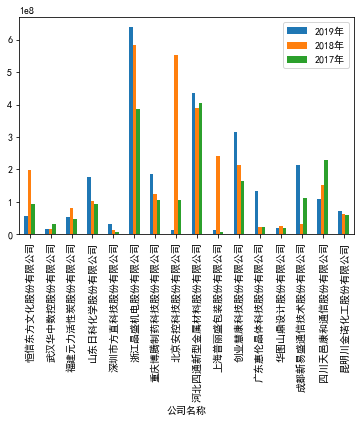

In [8]:
#柱状图
所有公司净利润.plot(kind='bar')       
plt.show()


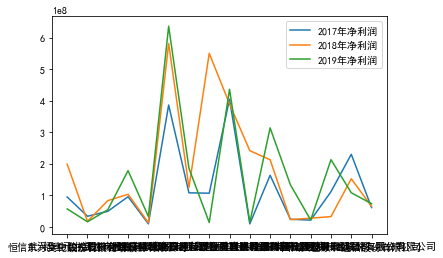

In [9]:
#折线图
plt.plot(所有公司净利润['2017年'],label='2017年净利润')
plt.plot(所有公司净利润['2018年'],label='2018年净利润')
plt.plot(所有公司净利润['2019年'],label='2019年净利润')
plt.legend() 


###   根据所画的柱状图和折线图我们可以看到，在我们所选取的16家上市公司中，2018年的净利润普遍比2017年和2019年的净利润高，可能是受到了当时宏观经济政策的影响，有很大的发展机遇。从单个公司来看，浙江晶盛机电股份有限公司在这三年的时间内，均取得了较高的净利润，遥遥领先我们所选取的其它公司。